# The Sparks Foundation (Graduate Rotational Internship Program)

### Name: Akash Gohil
### Date: April, 2021

-----------------------------------------------------------------------------------------------------------------

### Task #6 : Prediction using Decision Tree Algorithm

Classify iris plants into three species in this classic dataset

Dataset Link: https://bit.ly/3kXTdox


**The columns in this dataset are:**

* `Id`
* `SepalLengthCm` - Length of the sepal (in cm)
* `SepalWidthCm` - Width of the sepal (in cm)
* `PetalLengthCm` - Length of the petal (in cm)
* `PetalWidthCm` - Width of the petal (in cm)
* `Species` - Species name

### Importing required libraries

In [89]:
#Importing all the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Load Data

In [90]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [92]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [93]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [94]:
df.shape

(150, 6)

In [95]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

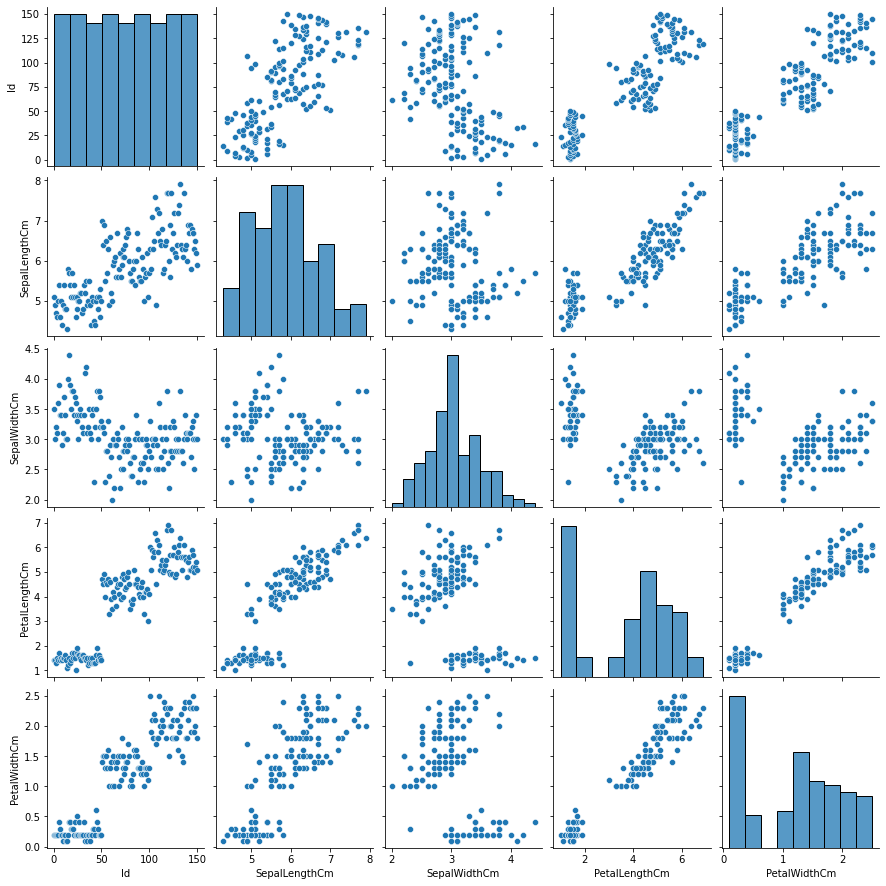

In [96]:
sns.pairplot(df)

In [97]:
#Convert the categorical data into numbers

map = {
    "Species":{
        "Iris-virginica":1,
        "Iris-setosa":2,
        "Iris-versicolor":3
    }
}

In [98]:
df = df.replace(map)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [99]:
# Dropped ID columns
df.drop("Id", axis=1, inplace=True)

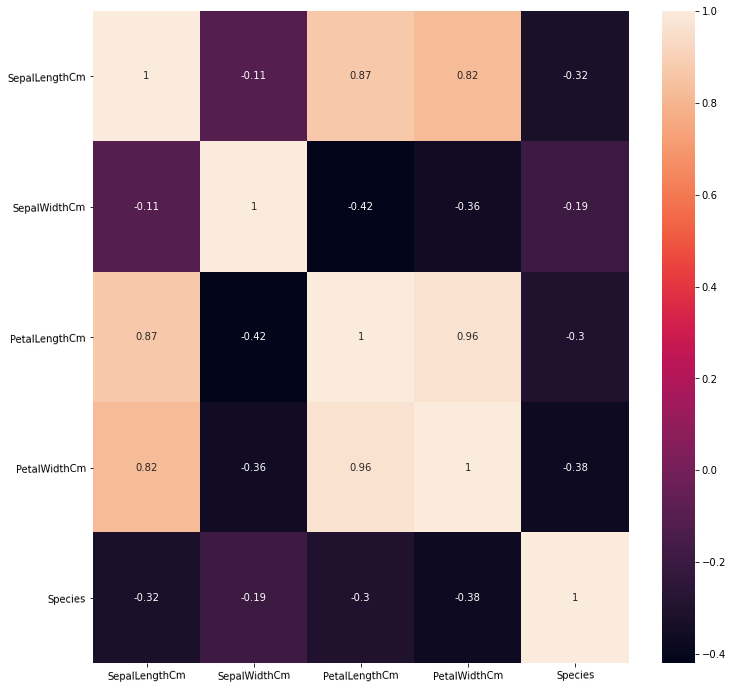

In [100]:
# Correlation between different features
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=1)
plt.yticks(rotation=1);

### Split train and test set

In [101]:
np.random.seed(42)

X = df.drop("Species", axis=1)
Y = df.Species

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2)

In [102]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(120, 4) (120,) (30, 4) (30,)


### Model Initialization

In [103]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [113]:
print("Training Accuracy:", model.score(X_train,Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [105]:
#Let's predict out X_test data
Y_pred = model.predict(X_test)
Y_pred

array([3, 2, 1, 3, 3, 2, 3, 1, 3, 3, 1, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

In [106]:
Y_test[:10]

73     3
18     2
118    1
78     3
76     3
31     2
64     3
141    1
68     3
82     3
Name: Species, dtype: int64

In [107]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_pred, Y_test)),
               columns =['Predicted', 'Actual'])
comparison[:10]

,Predicted,Actual
0,3,3
1,2,2
2,1,1
3,3,3
4,3,3
5,2,2
6,3,3
7,1,1
8,3,3
9,3,3


In [108]:
confusion_matrix(Y_pred,Y_test)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

In [109]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



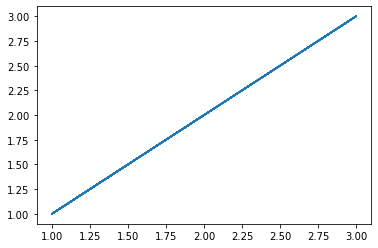

In [110]:
plt.plot(Y_pred, Y_test)

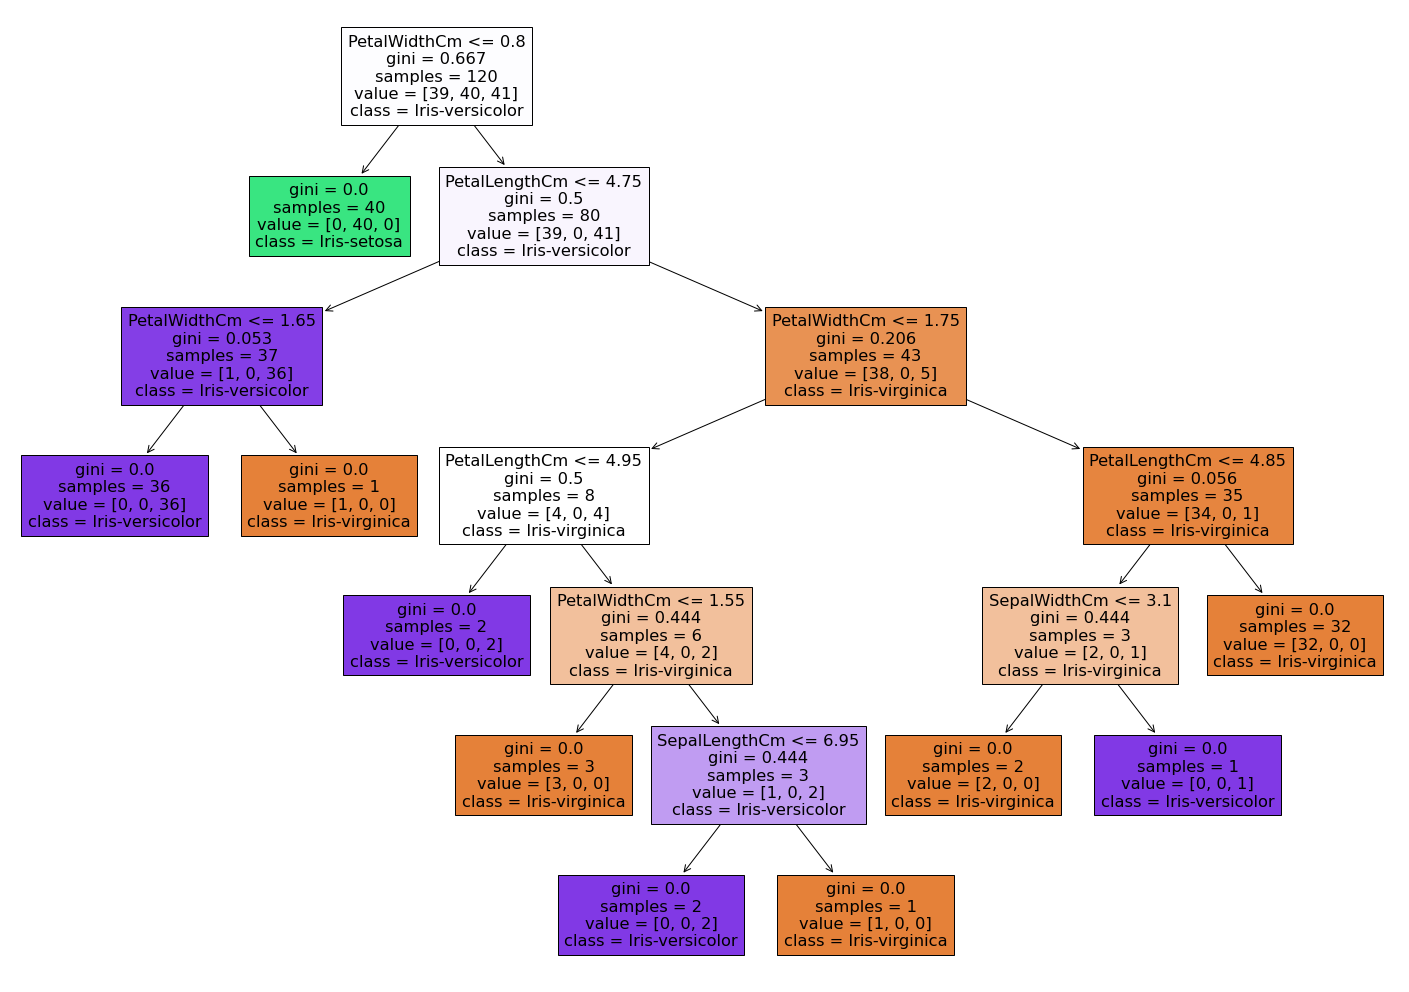

In [111]:
# Decision Tree Visualization
plt.figure(figsize=(25,18))
tree.plot_tree(model,
               feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
               class_names=["Iris-virginica","Iris-setosa","Iris-versicolor"], filled=True);

Now you can feed any new data to this classifier, it will predict the right class accurately.

## ------------------------------------------------------THANK YOU---------------------------------------------------------